In [1]:
import pandas as pd

In [2]:
# 1 读取文件数据
stock_day = pd.read_csv('../day04/stock_day/stock_day.csv')

In [3]:
# 2 重新进行日期排列
stock_day = stock_day.sort_index()

In [4]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [5]:
# 讲index日期转化成pandas的日期对象
stock_day.index = pd.to_datetime(stock_day.index)

In [6]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [7]:
# 收盘价重采样
stock_week = stock_day.resample("W").last()

In [8]:
stock_week.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,15.38,15.48,15.34,15.18,76800.13,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,14.90,15.86,15.77,14.90,120352.13,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,16.44,16.77,16.66,16.25,91962.88,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15


In [9]:
# 开盘价重采样
stock_week["open"] = stock_day["open"].resample("W").first()

In [10]:
# 最高价重采样
stock_week["high"] = stock_day["high"].resample("W").max()

In [11]:
# 最低价重采样
stock_week["low"] = stock_day["low"].resample("W").min()

In [12]:
stock_week.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,12.25,14.48,14.28,12.20,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.14,15.08,14.47,13.80,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,14.52,15.66,15.34,14.51,76800.13,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,15.34,16.16,15.77,14.90,120352.13,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,15.99,16.88,16.66,15.99,91962.88,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15


## K线图显示

In [13]:
# 先画日K
from mpl_finance import candlestick_ochl
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num

In [14]:
day_k = stock_day[["open", "close", "high", "low"]]

In [15]:
day_k["date"] = date2num(stock_day.index)

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
day_k

,open,close,high,low,date
2015-03-02,12.25,12.52,12.67,12.20,735659.0
2015-03-03,12.52,12.70,13.06,12.52,735660.0
2015-03-04,12.80,12.90,12.92,12.61,735661.0
2015-03-05,12.88,13.16,13.45,12.87,735662.0
2015-03-06,13.17,14.28,14.48,13.13,735663.0
2015-03-09,14.14,14.31,14.85,13.80,735666.0
2015-03-10,14.20,14.65,14.80,14.01,735667.0
2015-03-11,14.80,14.30,15.08,14.14,735668.0
2015-03-12,14.11,14.11,14.80,13.95,735669.0
2015-03-13,14.13,14.47,14.50,14.08,735670.0


In [17]:
day_k = day_k[["date","open", "close", "high", "low"]]

In [18]:
day_k.values

array([[7.35659e+05, 1.22500e+01, 1.25200e+01, 1.26700e+01, 1.22000e+01],
       [7.35660e+05, 1.25200e+01, 1.27000e+01, 1.30600e+01, 1.25200e+01],
       [7.35661e+05, 1.28000e+01, 1.29000e+01, 1.29200e+01, 1.26100e+01],
       ...,
       [7.36748e+05, 2.28800e+01, 2.28200e+01, 2.33700e+01, 2.27100e+01],
       [7.36751e+05, 2.28000e+01, 2.35300e+01, 2.37800e+01, 2.28000e+01],
       [7.36752e+05, 2.35300e+01, 2.41600e+01, 2.58800e+01, 2.35300e+01]])

In [19]:
help(candlestick_ochl)

Help on function candlestick_ochl in module mpl_finance:

candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    Plot the time, open, close, high, low as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
    
        time must be in float days format - see date2num
    
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
   

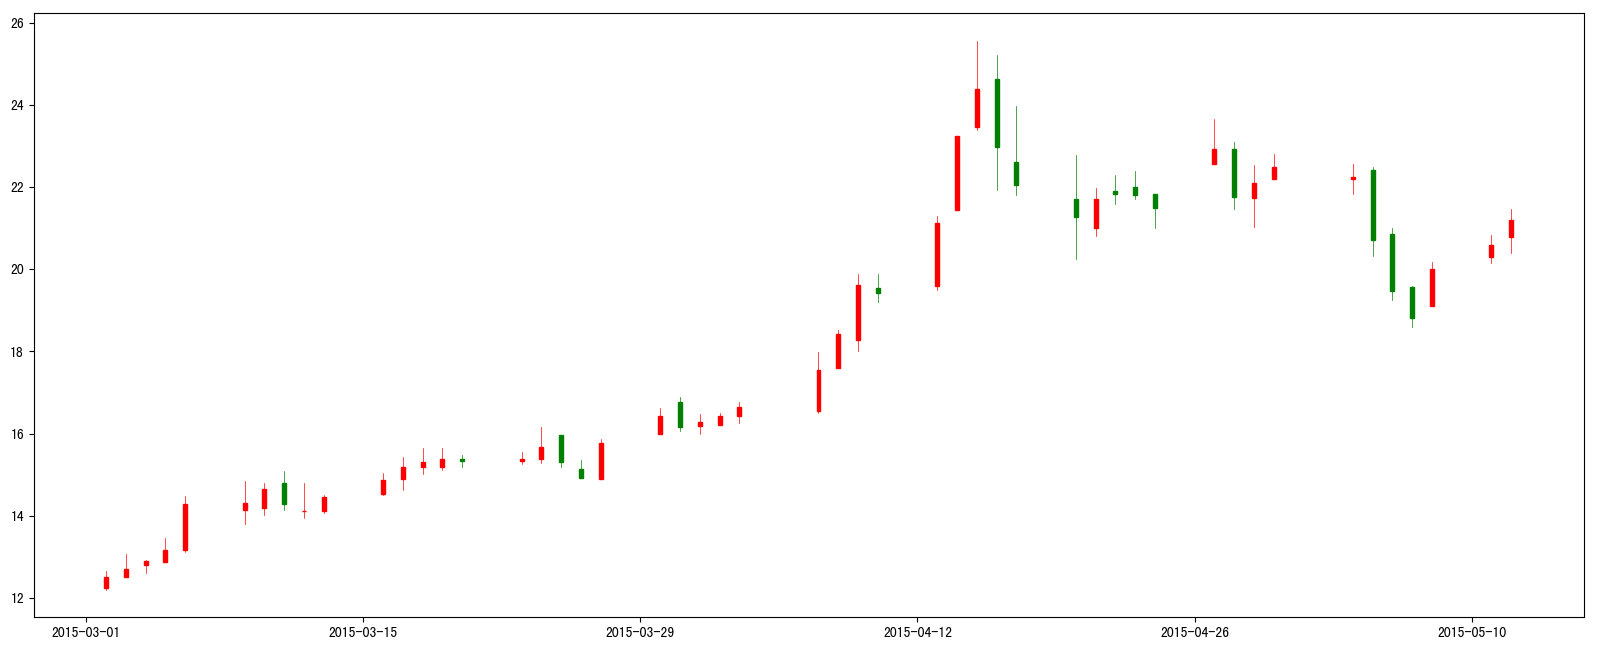

In [20]:
# 返回axes
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)
# 绘制k线图
candlestick_ochl(axes, day_k.values[:50], width=0.2, colorup="r", colordown="g")
# 让x轴显示日期
axes.xaxis_date()
# 显示
plt.show()

In [21]:
# 处理周k的日期
stock_week["date"] = date2num(stock_week.index)

In [22]:
week_k = stock_week[["date", "open", "close", "high", "low"]]
week_k.head()

,date,open,close,high,low
2015-03-08,735665.0,12.25,14.28,14.48,12.20
2015-03-15,735672.0,14.14,14.47,15.08,13.80
2015-03-22,735679.0,14.52,15.34,15.66,14.51
2015-03-29,735686.0,15.34,15.77,16.16,14.90
2015-04-05,735693.0,15.99,16.66,16.88,15.99


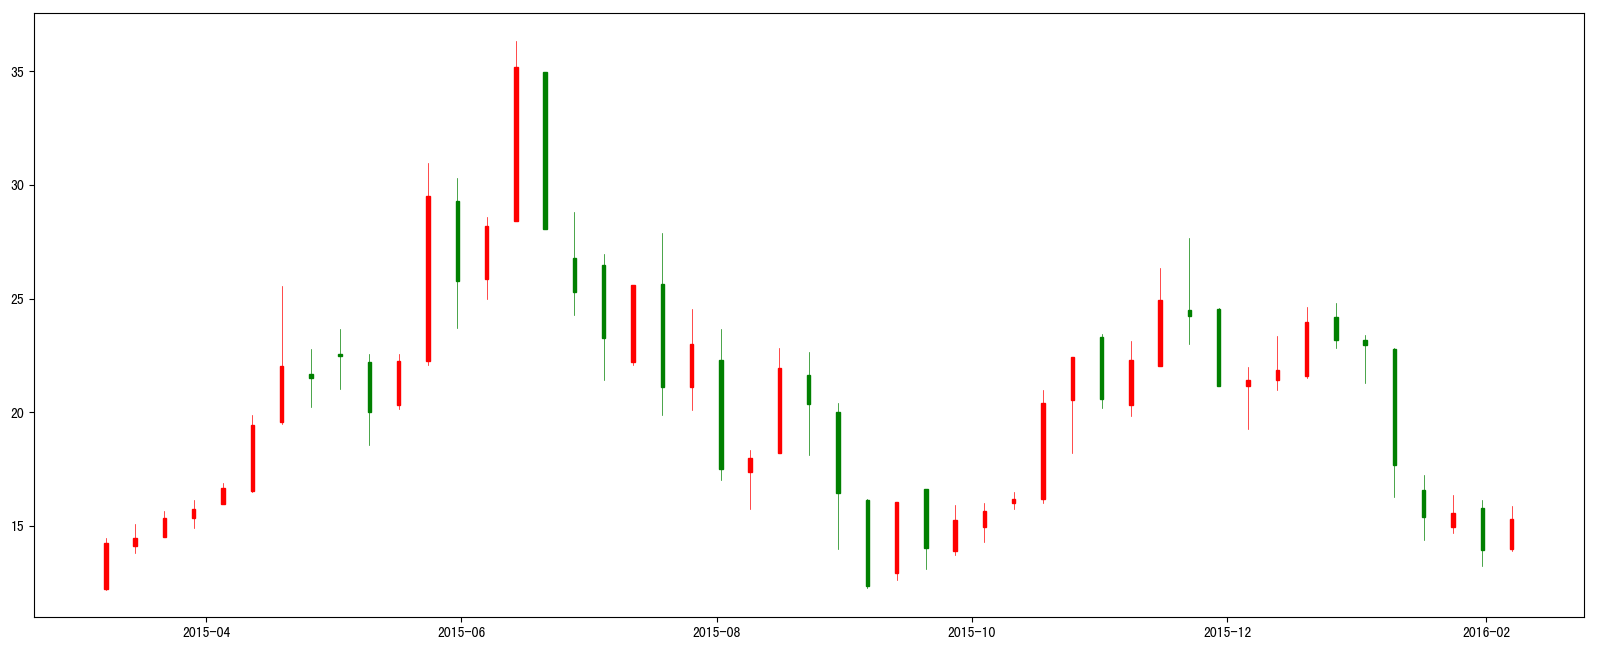

In [23]:
# 画周k
# 返回axes
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)
# 绘制k线图
candlestick_ochl(axes, week_k.values[:50], width=0.8, colorup="r", colordown="g")
# 让x轴显示日期
axes.xaxis_date()
# 显示
plt.show()

## Pandas的时间类型

In [24]:
# 方法1
pd.to_datetime("2018-07-06")

Timestamp('2018-07-06 00:00:00')

In [25]:
# 方法2
pd.to_datetime("07/06/2018")

Timestamp('2018-07-06 00:00:00')

In [26]:
# 方法3
pd.to_datetime("2018/07/06")

Timestamp('2018-07-06 00:00:00')

### pandas的时间序列类型

In [27]:
# 准备时间列表
date1 = ["2017-01-01", "2017-02-01", "2017-03-01"]

In [28]:
# 方法1 直接传入时间列表
pd.to_datetime(date1)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01'], dtype='datetime64[ns]', freq=None)

In [29]:
from datetime import datetime

In [30]:
date2 = [datetime(2018, 3, 1), datetime(2018, 3, 2)]

In [31]:
# 方法2 传入原生python的日期类型
pd.to_datetime(date2)

DatetimeIndex(['2018-03-01', '2018-03-02'], dtype='datetime64[ns]', freq=None)

In [32]:
import numpy as np

In [33]:
# 空值的情况
date3 = [np.nan, datetime(2018, 3, 1), datetime(2018, 3, 2)]

In [34]:
# NaT not a time 表示空值
pd.to_datetime(date3)

DatetimeIndex(['NaT', '2018-03-01', '2018-03-02'], dtype='datetime64[ns]', freq=None)

In [35]:
# 方法3 通过pd.DatetimeIndex进行转换
date0 = pd.DatetimeIndex(date1)

In [36]:
date0.values

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
# datetimeindex的属性
date0.year

Int64Index([2017, 2017, 2017], dtype='int64')

In [38]:
date0.day

Int64Index([1, 1, 1], dtype='int64')

## Pandas的基础时间序列结构

In [39]:
series_date = pd.Series(3.0, index=date1)

In [40]:
series_date.index = pd.DatetimeIndex(pd.to_datetime(series_date).index)

In [41]:
series_date.index.year

Int64Index([2017, 2017, 2017], dtype='int64')

### 生成指定频率的时间序列

In [42]:
# 1、生成2017-01-02~2017-12-30，生成频率为1天, 不跳过周六周日
pd.date_range("2017-01-02", "2017-12-30", freq="D")

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', length=363, freq='D')

In [43]:
# 3、只知道开始时间日期，我也知道总共天数多少，生成序列， 从"2016-01-01", 共504天，跳过周末
pd.date_range("2016-01-01", periods=504, freq="B")

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2017-11-23', '2017-11-24', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-04',
               '2017-12-05', '2017-12-06'],
              dtype='datetime64[ns]', length=504, freq='B')

In [44]:
# 6、按照1H30分钟去进行生成时间序列
pd.date_range("2017-01-02", "2017-12-30", freq='1H30min')

DatetimeIndex(['2017-01-02 00:00:00', '2017-01-02 01:30:00',
               '2017-01-02 03:00:00', '2017-01-02 04:30:00',
               '2017-01-02 06:00:00', '2017-01-02 07:30:00',
               '2017-01-02 09:00:00', '2017-01-02 10:30:00',
               '2017-01-02 12:00:00', '2017-01-02 13:30:00',
               ...
               '2017-12-29 10:30:00', '2017-12-29 12:00:00',
               '2017-12-29 13:30:00', '2017-12-29 15:00:00',
               '2017-12-29 16:30:00', '2017-12-29 18:00:00',
               '2017-12-29 19:30:00', '2017-12-29 21:00:00',
               '2017-12-29 22:30:00', '2017-12-30 00:00:00'],
              dtype='datetime64[ns]', length=5793, freq='90T')

In [45]:
# 7、按照每月最后一天
pd.date_range("2017-01-02", "2017-12-30", freq='M')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='M')

In [46]:
# 8、按照每个月的第几个星期几
pd.date_range("2017-01-02", "2017-12-30", freq='WOM-3FRI')

DatetimeIndex(['2017-01-20', '2017-02-17', '2017-03-17', '2017-04-21',
               '2017-05-19', '2017-06-16', '2017-07-21', '2017-08-18',
               '2017-09-15', '2017-10-20', '2017-11-17', '2017-12-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 对股票数据进行移动平均计算

In [47]:
# 1 准备数据
stock_day = pd.read_csv("../day04/stock_day/stock_day.csv")

In [48]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [49]:
from mpl_finance import candlestick_ochl
from matplotlib.pylab import date2num
# 处理日期类型
stock_day.index = pd.to_datetime(stock_day.index)
day_k = stock_day[["open", "close", "high", "low"]]
day_k["date"] = date2num(day_k.index)

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
day_k = day_k[["date", "open", "close", "high", "low"]]

In [51]:
day_k.head()

,date,open,close,high,low
2018-02-27,736752.0,23.53,24.16,25.88,23.53
2018-02-26,736751.0,22.80,23.53,23.78,22.80
2018-02-23,736748.0,22.88,22.82,23.37,22.71
2018-02-22,736747.0,22.25,22.28,22.76,22.02
2018-02-14,736739.0,21.49,21.92,21.99,21.48


In [52]:
help(candlestick_ochl)

Help on function candlestick_ochl in module mpl_finance:

candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    Plot the time, open, close, high, low as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
    
        time must be in float days format - see date2num
    
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
   

In [53]:
# 画日K图
import matplotlib.pyplot as plt

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=26).mean()
  from ipykernel import kernelapp as app
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
  app.launch_new_instance()


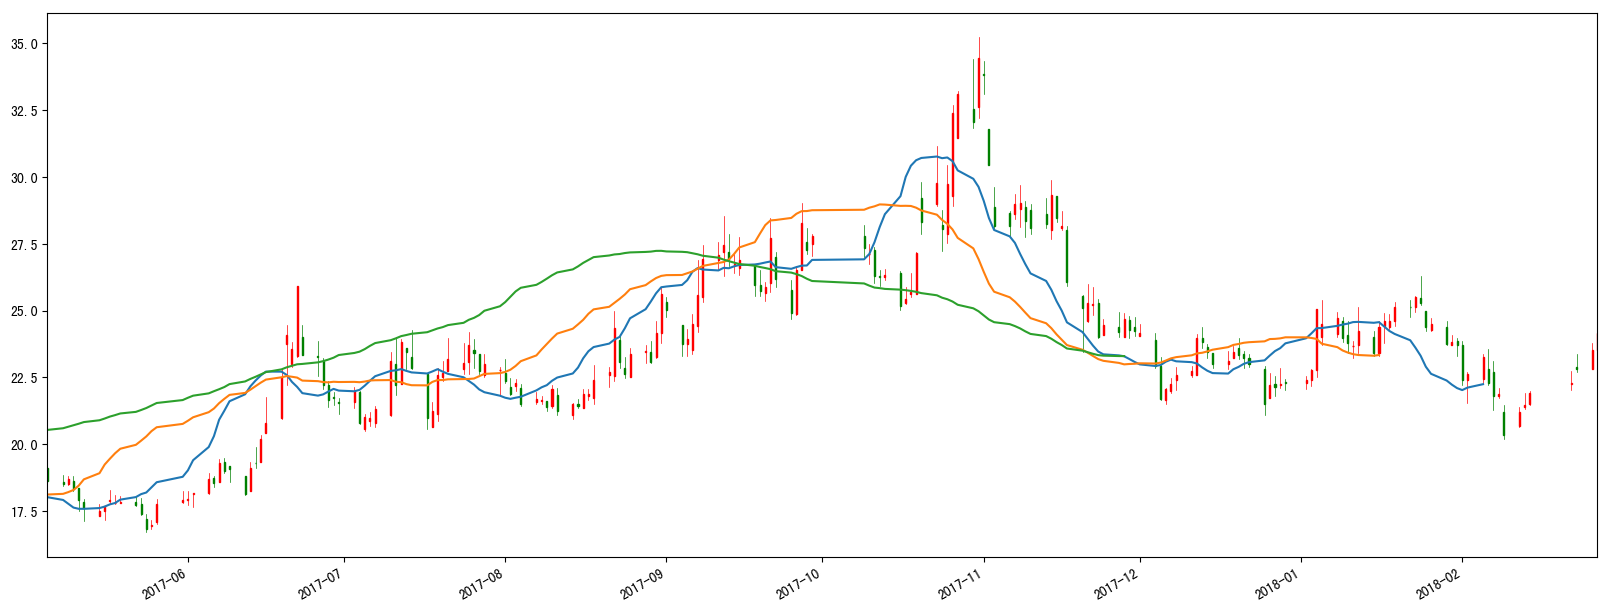

In [56]:
# 创建绘图区
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)

# 绘制K线图
candlestick_ochl(axes, day_k.values[:200], width=0.2, colorup="r", colordown="g")

# 修改x轴刻度为日期
axes.xaxis_date()

# 网格
plt.grid(linestyle="--", alpha=0.5)

# 添加移动平均线
pd.rolling_mean(stock_day["close"][:200], window=12).plot()
pd.rolling_mean(stock_day["close"][:200], window=26).plot()
pd.rolling_mean(stock_day["close"][:200], window=60).plot()

# 显示
plt.show()

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,span=10).mean()
  from ipykernel import kernelapp as app
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,span=30).mean()
  app.launch_new_instance()
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,span=60).mean()
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.rolling_var is deprecated for Series and will be r

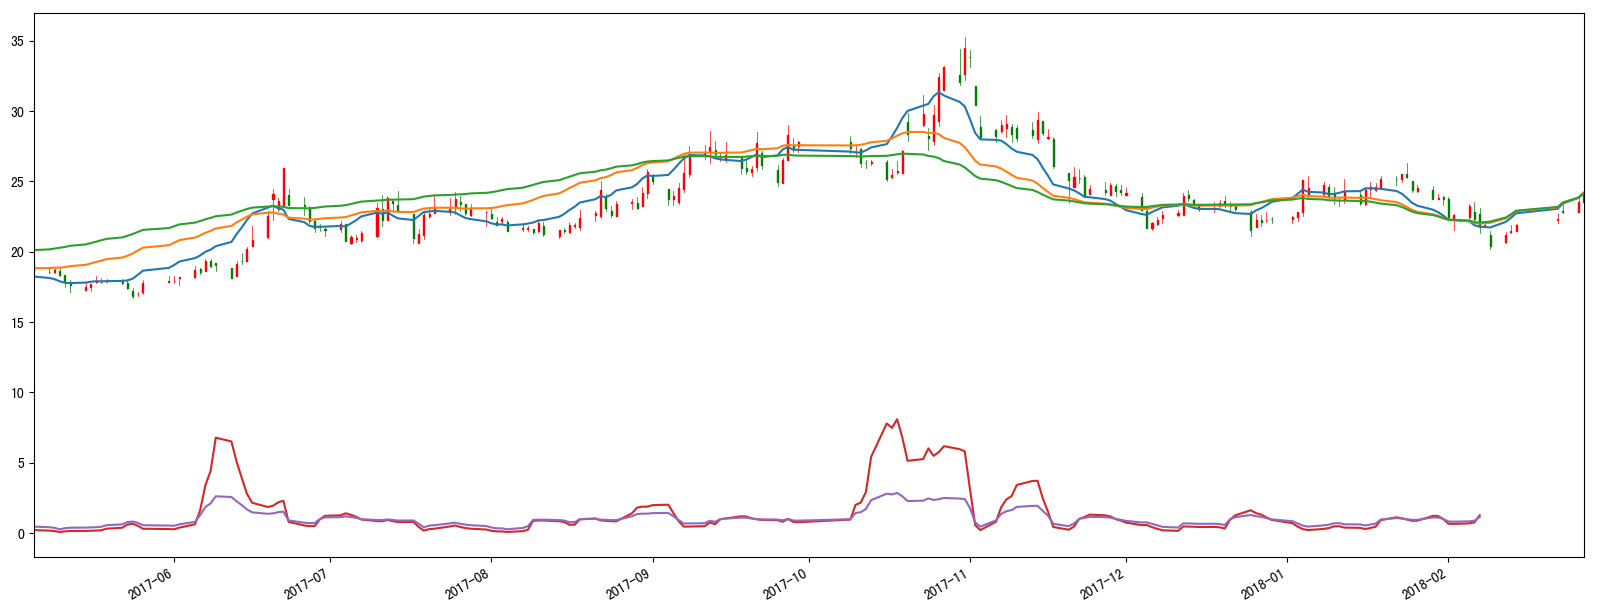

In [57]:
# 画出指数平滑移动平均线
# 创建绘图区
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)

# 绘制K线图
candlestick_ochl(axes, day_k.values[:200], width=0.2, colorup="r", colordown="g")

# 修改x轴刻度为日期
axes.xaxis_date()

# 网格
plt.grid(linestyle="--", alpha=0.5)

# 添加移动平均线
pd.ewma(stock_day['close'][:200], span=10).plot()
pd.ewma(stock_day['close'][:200], span=30).plot()
pd.ewma(stock_day['close'][:200], span=60).plot()

# 求出指定窗口大小的收盘价标准差和方差
pd.rolling_var(stock_day['close'][:200], window=10).plot()
pd.rolling_std(stock_day['close'][:200], window=10).plot()

# 显示
plt.show()

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


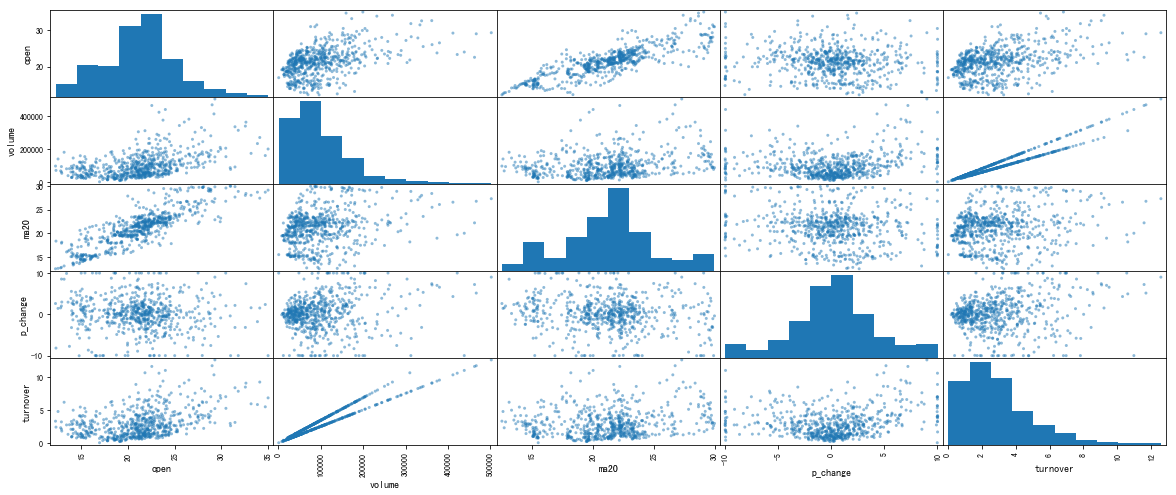

In [58]:
# 各项指标数据两两关联散点图
frame = stock_day[['open','volume', 'ma20', 'p_change', 'turnover']]

pd.scatter_matrix(frame, figsize=(20, 8))

# 显示
plt.show()

In [60]:
# 移动平均线数据本地保存
ma_list = [5, 20 ,60]
for ma in ma_list:
    stock_day['MA' + str(ma)] = pd.rolling_mean(stock_day.close, window=ma)
for ma in ma_list:
    stock_day['EMA' + str(ma)] = pd.ewma(stock_day.close, span=ma)

stock_day.to_csv("EWMA.csv")

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  after removing the cwd from sys.path.
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  after removing the cwd from sys.path.
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
  after removing the cwd from sys.path.
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a fu

### 案例： 计算MACD指标、画出图形

In [75]:
# 1.准备日线数据
stock_day = pd.read_csv("../day04/stock_day/stock_day.csv")
stock_day = stock_day.sort_index()[:200]
stock_day.index = pd.to_datetime(stock_day.index)
stock_day["date"] = date2num(stock_day.index)
day_k = stock_day[["date", "open", "close", "high", "low"]]

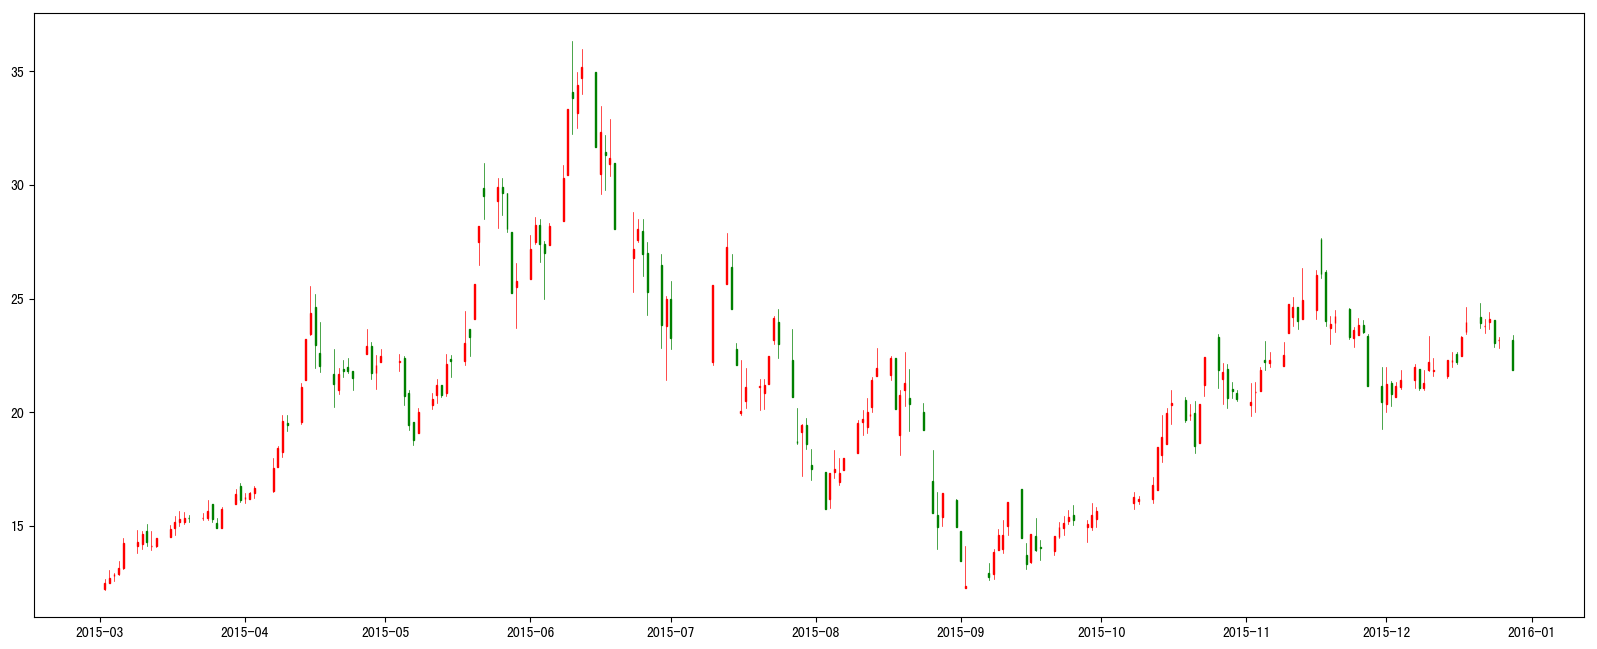

In [76]:
# 2.绘制
# 创建绘图区
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)

# 绘制K线图
candlestick_ochl(axes, day_k.values[:200], width=0.2, colorup="r", colordown="g")

# 修改x轴刻度为日期
axes.xaxis_date()

# 显示
plt.show()

In [77]:
import talib
import numpy as np

In [78]:
# 计算MACD的指标
dif, dea, bar = talib.MACD(stock_day["close"].values, fastperiod=12, slowperiod=26, signalperiod=9)

/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/home/python/.virtualenvs/ai/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


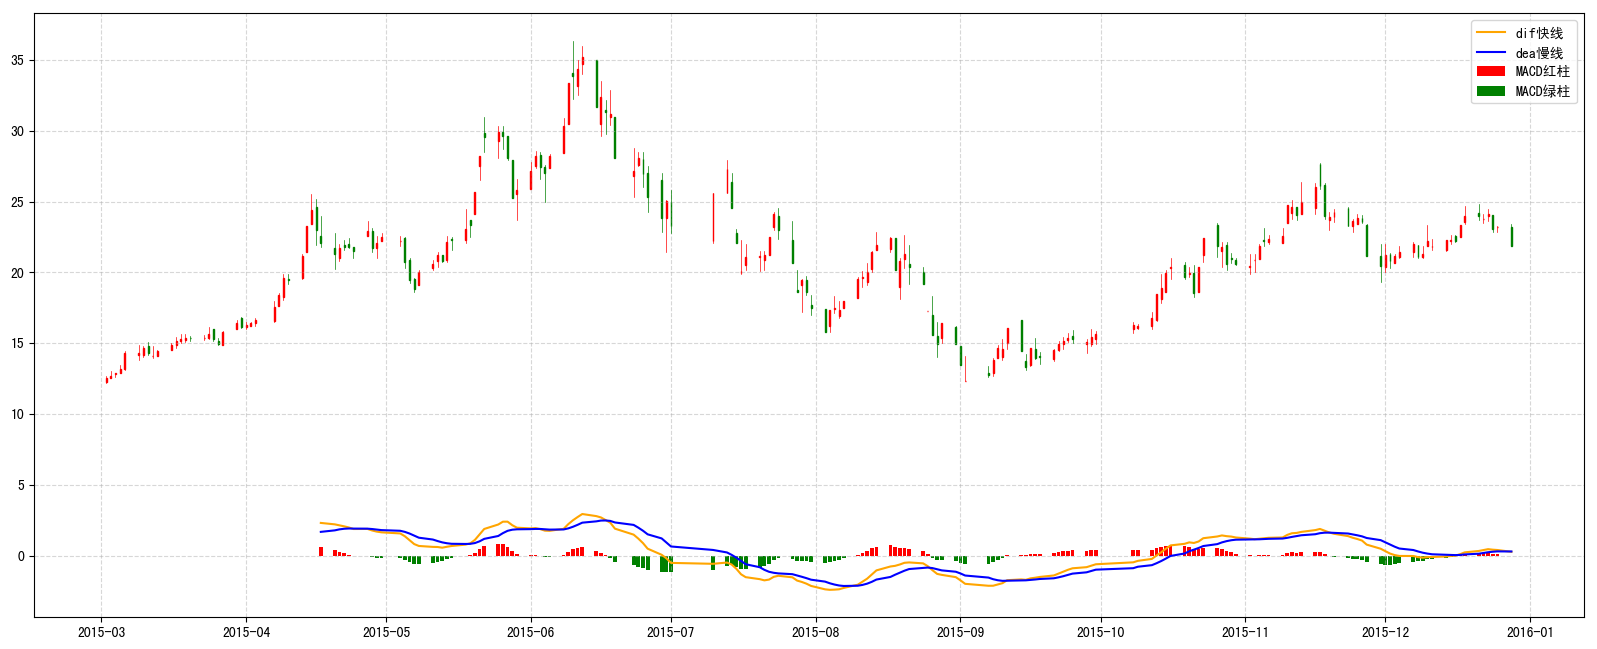

In [82]:
# 1.准备日线数据
stock_day = pd.read_csv("../day04/stock_day/stock_day.csv")
stock_day = stock_day.sort_index()[:200]
stock_day.index = pd.to_datetime(stock_day.index)
stock_day["date"] = date2num(stock_day.index)
day_k = stock_day[["date", "open", "close", "high", "low"]]

# 准备x轴的刻度
x = stock_day["date"]

# 2.绘制
# 创建绘图区
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)

# 绘制日K线图
candlestick_ochl(axes, day_k.values[:200], colorup="r", colordown="g")

# 修改x轴刻度为日期
axes.xaxis_date()

# 绘制MACD快慢线
plt.plot(x, dif, color="orange", label="dif快线")
plt.plot(x, dea, color="blue", label="dea慢线")

# 绘制红绿柱
red_bar = np.where(bar > 0, bar, 0)
green_bar = np.where(bar < 0, bar, 0)

plt.bar(x, red_bar, color="red", label="MACD红柱")
plt.bar(x, green_bar, color="green", label="MACD绿柱")

# 显示图例
plt.legend()

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 显示
plt.show()

### MACD交易策略 金叉死叉

In [84]:
for i in range(1,200):
    # 买入
    if dif[i-1] < dea[i-1] and dif[i] > dea[i]:
        print("第%d天应该买入某只股票的多少股" % i)
    # 卖出
    if dif[i-1] > dea[i-1] and dif[i] < dea[i]:
        print("第%d天应该卖出某只股票的多少股" % i)

第38天应该卖出某只股票的多少股
第54天应该买入某只股票的多少股
第65天应该卖出某只股票的多少股
第68天应该买入某只股票的多少股
第76天应该卖出某只股票的多少股
第106天应该买入某只股票的多少股
第118天应该卖出某只股票的多少股
第128天应该买入某只股票的多少股
第173天应该卖出某只股票的多少股
第192天应该买入某只股票的多少股
第199天应该卖出某只股票的多少股


### 案例：RSI指标计算以及交易判断实现

In [85]:
# 计算RSI长短线的值
short_rsi = talib.RSI(stock_day["close"].values, timeperiod=6)
long_rsi = talib.RSI(stock_day["close"].values, timeperiod=12)

In [87]:
for i in range(1,200):
# 1．白色的短期RSI值在20以下，由下向上交叉黄色的长期RSI值时为买入信号。
# 2．白色的短期RSI值在80以上，由上向下交叉黄色的长期RSI值时为卖出信号。
# 条件太苛刻 无满足
    # 买入
#     if dif[i-1] < dea[i-1] and dif[i] > dea[i] and short_rsi[i] < 20 and short_rsi[i-1] < long_rsi[i-1] and short_rsi[i] > long_rsi[i]: 
    if dif[i-1] < dea[i-1] and dif[i] > dea[i] and short_rsi[i] < 50:    
        print("第%d天应该买入某只股票的多少股" % i)
    # 卖出
#     if dif[i-1] > dea[i-1] and dif[i] < dea[i] and short_rsi[i] > 80 and short_rsi[i-1] > long_rsi[i-1] and short_rsi[i] < long_rsi[i]:
    if dif[i-1] > dea[i-1] and dif[i] < dea[i] and short_rsi[i] > 50:    
        print("第%d天应该卖出某只股票的多少股" % i)

第38天应该卖出某只股票的多少股
第65天应该卖出某只股票的多少股
第173天应该卖出某只股票的多少股


### 案例：BOLL布林线计算及绘制

In [93]:
up, mid, down = talib.BBANDS(stock_day["close"].values[:200], timeperiod=6, nbdevdn=2, nbdevup=2)

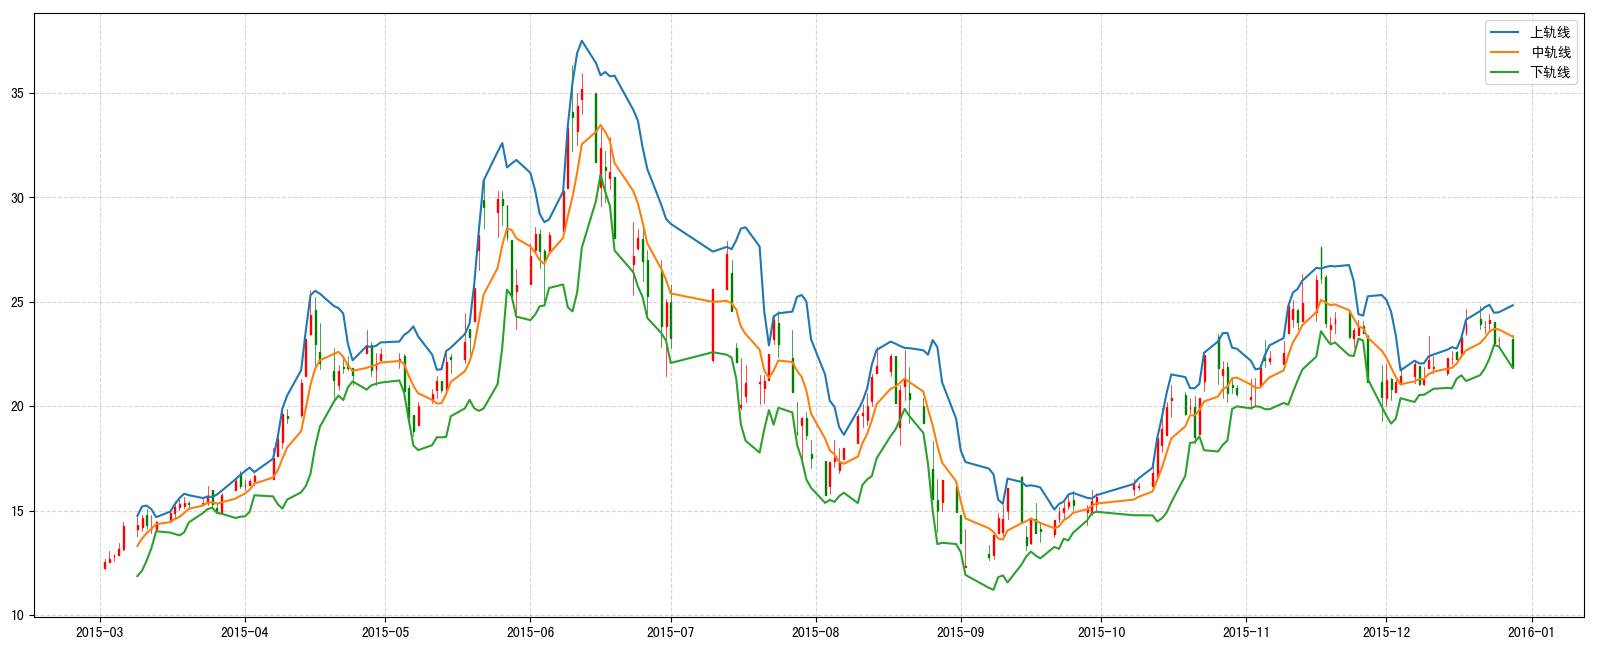

In [94]:
# 1.准备日线数据
stock_day = pd.read_csv("../day04/stock_day/stock_day.csv")
stock_day = stock_day.sort_index()[:200]
stock_day.index = pd.to_datetime(stock_day.index)
stock_day["date"] = date2num(stock_day.index)
day_k = stock_day[["date", "open", "close", "high", "low"]]

# 准备x轴的刻度
x = stock_day["date"][:200]

# 2.绘制
# 创建绘图区
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), dpi=100)

# 绘制日K线图
candlestick_ochl(axes, day_k.values[:200], colorup="r", colordown="g")

# 修改x轴刻度为日期
axes.xaxis_date()

# 绘制三条布林线
plt.plot(x, up, label="上轨线")
plt.plot(x, mid, label="中轨线")
plt.plot(x, down, label="下轨线")

# 显示图例
plt.legend()

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 显示
plt.show()